In [10]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tabulate import tabulate

warnings.filterwarnings('ignore')


# Настройка отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [11]:
df = pd.read_csv("kc_house_data.csv")

df.head(8)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [12]:
df = pd.read_csv('kc_house_data.csv')

print(f"Исходное количество строк: {len(df)}")

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Применение функции к количественным признакам
numeric_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
df_clean = remove_outliers(df, numeric_cols)

print(f"Количество строк после удаления выбросов: {len(df_clean)}")
print(f"Удалено строк: {len(df) - len(df_clean)}")
print(f"Процент удаленных строк: {((len(df) - len(df_clean)) / len(df) * 100):.2f}%")


Исходное количество строк: 21613
Количество строк после удаления выбросов: 17589
Удалено строк: 4024
Процент удаленных строк: 18.62%


## Подготовка данных

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Признаки:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'grade', 'sqft_above',
            'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
            'sqft_living15', 'sqft_lot15']
X = df_clean[features]
y = df_clean['price']

# Разделение на train и test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Обучение 16 различных конфигураций нейронных сетей


Конфигурация 1: слои (16,), activation relu


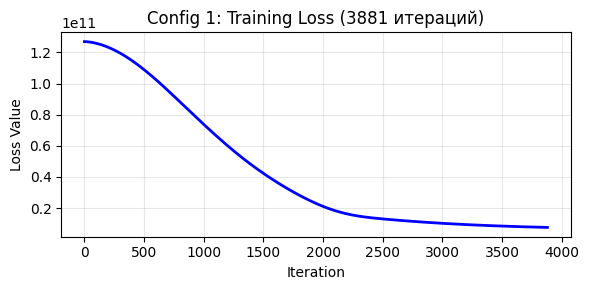

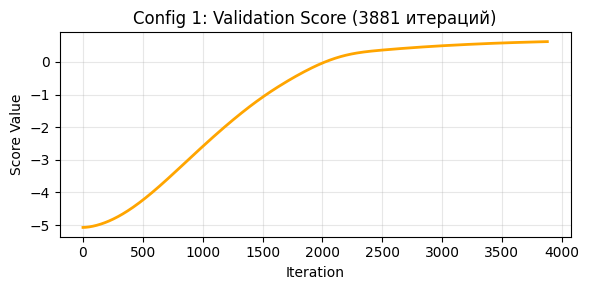

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 126980442021.808807
Итерация  432: 113002502681.115082
Итерация  863: 83749780527.512787
Итерация 1294: 54116655882.593147
Итерация 1725: 31486892219.688038
Итерация 2157: 17086950123.937443
Итерация 2588: 12418131466.057539
Итерация 3019: 10090424156.419470
Итерация 3450: 8540220210.970240
Итерация 3881: 7533631935.845055

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: -5.071900
Итерация  432: -4.420754
Итерация  863: -3.059143
Итерация 1294: -1.656621
Итерация 1725: -0.552940
Итерация 2157: 0.168009
Итерация 2588: 0.391602
Итерация 3019: 0.500479
Итерация 3450: 0.575428
Итерация 3881: 0.623776

Общее количество итераций: 3881
Начальный Training Loss: 126980442021.808807
Финальный Training Loss: 7533631935.845055
Максимальный Validation Score: 0.623776
Финальный Validation Score: 0.623776
RMSE: 121747.0, R²: 0.61828, Итераций: 3881, Времени потрачено 115.256 сек.

Конфигурация 2: сл

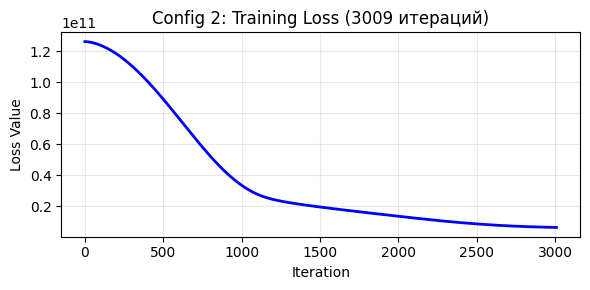

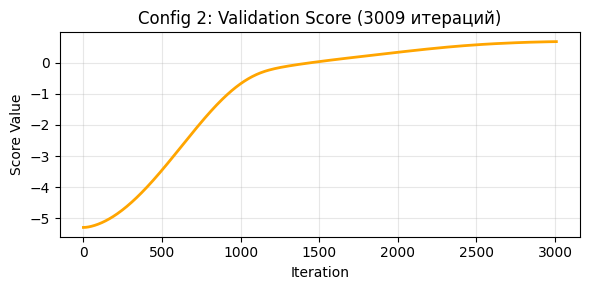

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 126332936530.976578
Итерация  335: 107465148436.310074
Итерация  669: 68322406011.954514
Итерация 1004: 33435080669.947716
Итерация 1338: 21921149943.272053
Итерация 1672: 17492299565.786907
Итерация 2006: 13600496219.605349
Итерация 2341: 10062895521.142429
Итерация 2675: 7612158206.931197
Итерация 3009: 6455638001.647551

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: -5.290893
Итерация  335: -4.354911
Итерация  669: -2.412133
Итерация 1004: -0.667559
Итерация 1338: -0.083874
Итерация 1672: 0.137908
Итерация 2006: 0.332829
Итерация 2341: 0.507302
Итерация 2675: 0.619971
Итерация 3009: 0.671745

Общее количество итераций: 3009
Начальный Training Loss: 126332936530.976578
Финальный Training Loss: 6455638001.647551
Максимальный Validation Score: 0.671745
Финальный Validation Score: 0.671745
RMSE: 112947.8, R²: 0.67146, Итераций: 3009, Времени потрачено 132.969 сек.

Конфигурация 3: сл

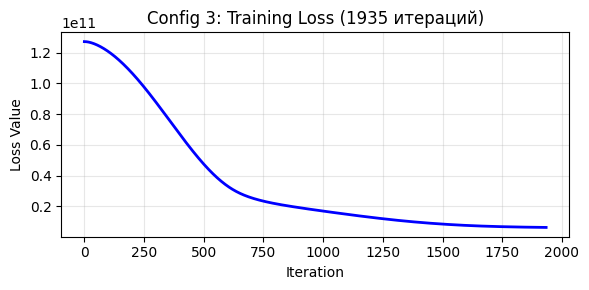

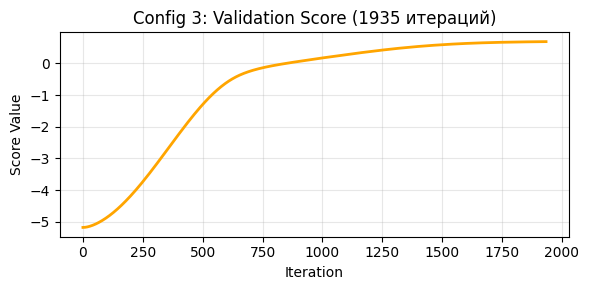

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 127112688135.644226
Итерация  216: 104029014087.393326
Итерация  431: 60725055205.281960
Итерация  646: 29015287946.054840
Итерация  861: 20163912988.941277
Итерация 1075: 15408630836.053511
Итерация 1290: 11339390577.848190
Итерация 1505: 8480292160.841836
Итерация 1720: 6961687448.288473
Итерация 1935: 6348662288.848431

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: -5.182442
Итерация  216: -4.051829
Итерация  431: -1.940151
Итерация  646: -0.403361
Итерация  861: 0.015894
Итерация 1075: 0.251547
Итерация 1290: 0.454949
Итерация 1505: 0.593372
Итерация 1720: 0.662481
Итерация 1935: 0.688946

Общее количество итераций: 1935
Начальный Training Loss: 127112688135.644226
Финальный Training Loss: 6348662288.848431
Максимальный Validation Score: 0.688946
Финальный Validation Score: 0.688946
RMSE: 111718.9, R²: 0.67857, Итераций: 1935, Времени потрачено 78.748 сек.

Конфигурация 4: слои 

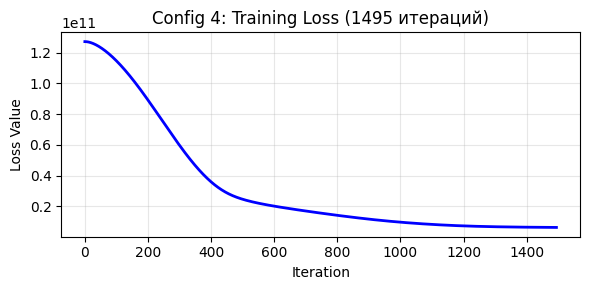

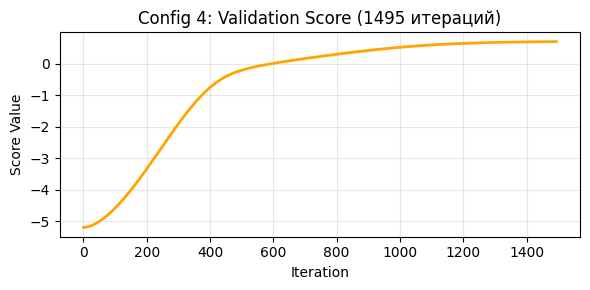

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 127192246149.283371
Итерация  167: 98726695626.443085
Итерация  333: 50975271727.805595
Итерация  499: 24708272681.974045
Итерация  665: 18018294784.395607
Итерация  831: 13337391621.572470
Итерация  997: 9731393071.196619
Итерация 1163: 7561560008.849030
Итерация 1329: 6595560629.693993
Итерация 1495: 6250519604.972738

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: -5.198184
Итерация  167: -3.806519
Итерация  333: -1.484482
Итерация  499: -0.213675
Итерация  665: 0.111279
Итерация  831: 0.337796
Итерация  997: 0.517296
Итерация 1163: 0.628372
Итерация 1329: 0.680920
Итерация 1495: 0.700518

Общее количество итераций: 1495
Начальный Training Loss: 127192246149.283371
Финальный Training Loss: 6250519604.972738
Максимальный Validation Score: 0.700518
Финальный Validation Score: 0.700518
RMSE: 110477.9, R²: 0.68567, Итераций: 1495, Времени потрачено 94.394 сек.

Конфигурация 5: слои (3

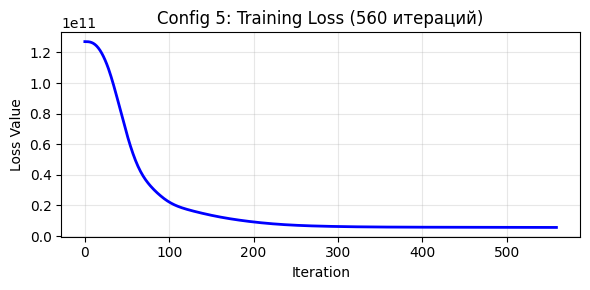

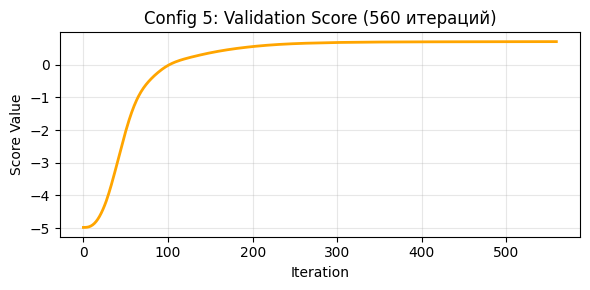

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 127081692646.489578
Итерация   63: 46850584515.996178
Итерация  125: 17022312066.832050
Итерация  187: 10211776939.076599
Итерация  249: 7140046901.581929
Итерация  312: 6160454275.711389
Итерация  374: 5871989201.022357
Итерация  436: 5775719533.675310
Итерация  498: 5716717454.314579
Итерация  560: 5668893660.679492

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: -4.981863
Итерация   63: -1.132898
Итерация  125: 0.210298
Итерация  187: 0.515756
Итерация  249: 0.644746
Итерация  312: 0.686024
Итерация  374: 0.698670
Итерация  436: 0.703441
Итерация  498: 0.706083
Итерация  560: 0.708326

Общее количество итераций: 560
Начальный Training Loss: 127081692646.489578
Финальный Training Loss: 5668893660.679492
Максимальный Validation Score: 0.708326
Финальный Validation Score: 0.708326
RMSE: 105736.0, R²: 0.71208, Итераций: 560, Времени потрачено 16.42 сек.

Конфигурация 6: слои (64, 16),

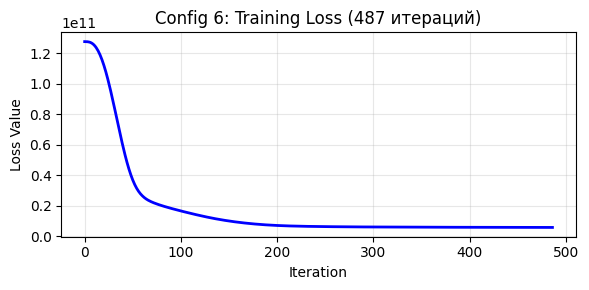

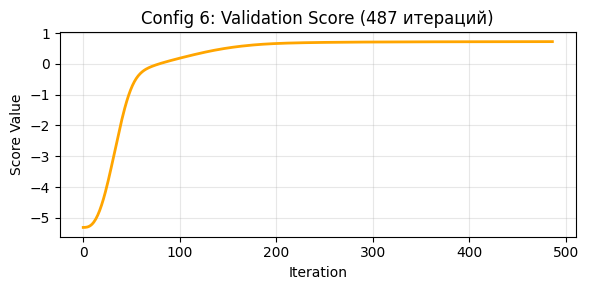

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 127586507514.921738
Итерация   55: 31388236535.988945
Итерация  109: 15230616433.314236
Итерация  163: 8889754994.330799
Итерация  217: 6603736465.773153
Итерация  271: 6093264690.615321
Итерация  325: 5904191316.679236
Итерация  379: 5801690914.891712
Итерация  433: 5732727457.547466
Итерация  487: 5685415689.004827

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: -5.309589
Итерация   55: -0.522981
Итерация  109: 0.246219
Итерация  163: 0.566396
Итерация  217: 0.676262
Итерация  271: 0.701486
Итерация  325: 0.710914
Итерация  379: 0.715475
Итерация  433: 0.718172
Итерация  487: 0.720257

Общее количество итераций: 487
Начальный Training Loss: 127586507514.921738
Финальный Training Loss: 5685415689.004827
Максимальный Validation Score: 0.720257
Финальный Validation Score: 0.720257
RMSE: 105230.8, R²: 0.71482, Итераций: 487, Времени потрачено 16.955 сек.

Конфигурация 7: слои (128, 64,

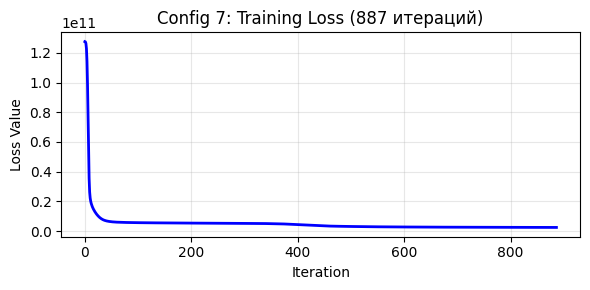

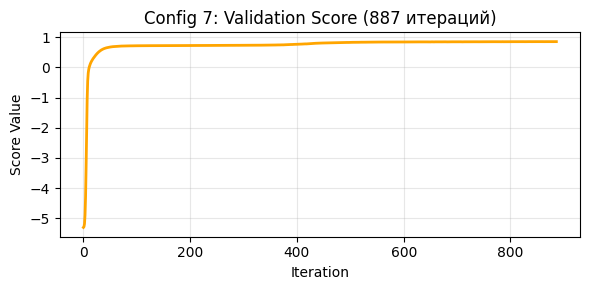

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 127586156936.442886
Итерация   99: 5668656661.098715
Итерация  198: 5380489546.678349
Итерация  296: 5172707029.848965
Итерация  395: 4492984817.607947
Итерация  493: 3142744054.070161
Итерация  592: 2776532157.703771
Итерация  690: 2617899352.633559
Итерация  789: 2521529641.509341
Итерация  887: 2453808737.576604

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: -5.307626
Итерация   99: 0.719718
Итерация  198: 0.728431
Итерация  296: 0.736224
Итерация  395: 0.765018
Итерация  493: 0.829519
Итерация  592: 0.846483
Итерация  690: 0.851211
Итерация  789: 0.855206
Итерация  887: 0.857856

Общее количество итераций: 887
Начальный Training Loss: 127586156936.442886
Финальный Training Loss: 2453808737.576604
Максимальный Validation Score: 0.857856
Финальный Validation Score: 0.857856
RMSE: 73919.1, R²: 0.85928, Итераций: 887, Времени потрачено 93.325 сек.

Конфигурация 8: слои (256, 128, 32

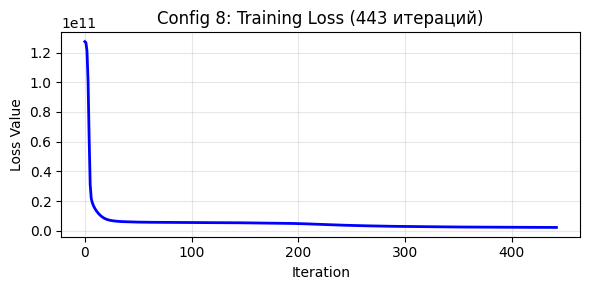

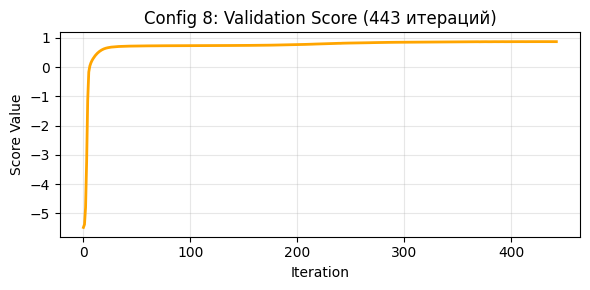

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 127347822513.164124
Итерация   50: 5875546351.755628
Итерация   99: 5569955290.055224
Итерация  148: 5402191308.904453
Итерация  197: 4950949286.026563
Итерация  247: 3706280750.884625
Итерация  296: 2969841954.878383
Итерация  345: 2608169480.187086
Итерация  394: 2416045961.014962
Итерация  443: 2291922204.872353

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: -5.477306
Итерация   50: 0.724754
Итерация   99: 0.737116
Итерация  148: 0.744706
Итерация  197: 0.767851
Итерация  247: 0.824287
Итерация  296: 0.853127
Итерация  345: 0.867986
Итерация  394: 0.870697
Итерация  443: 0.873526

Общее количество итераций: 443
Начальный Training Loss: 127347822513.164124
Финальный Training Loss: 2291922204.872353
Максимальный Validation Score: 0.874706
Финальный Validation Score: 0.873526
RMSE: 73032.7, R²: 0.86264, Итераций: 443, Времени потрачено 95.499 сек.

Конфигурация 9: слои (16,), activa

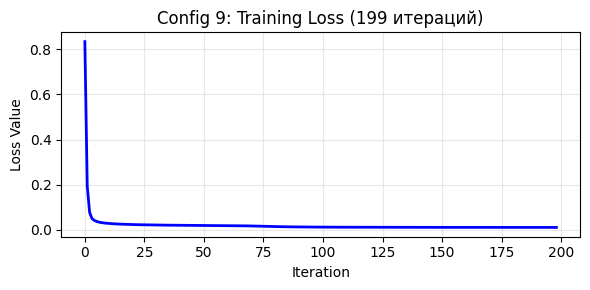

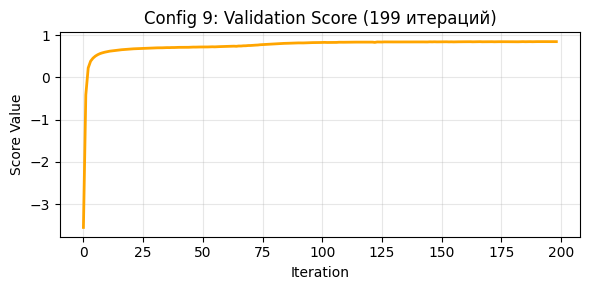

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 0.833611
Итерация   23: 0.023506
Итерация   45: 0.020588
Итерация   67: 0.018608
Итерация   89: 0.013660
Итерация  111: 0.012269
Итерация  133: 0.011860
Итерация  155: 0.011635
Итерация  177: 0.011487
Итерация  199: 0.011317

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: -3.553619
Итерация   23: 0.682628
Итерация   45: 0.715710
Итерация   67: 0.745817
Итерация   89: 0.818597
Итерация  111: 0.836466
Итерация  133: 0.843089
Итерация  155: 0.845500
Итерация  177: 0.846920
Итерация  199: 0.849781

Общее количество итераций: 199
Начальный Training Loss: 0.833611
Финальный Training Loss: 0.011317
Максимальный Validation Score: 0.850288
Финальный Validation Score: 0.849781
RMSE: 79074.8, R²: 0.83897, Итераций: 199, Времени потрачено 3.551 сек.

Конфигурация 10: слои (32,), activation tanh


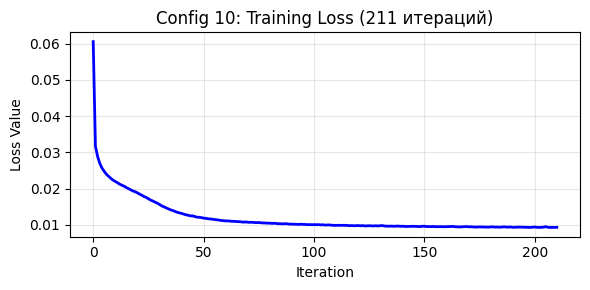

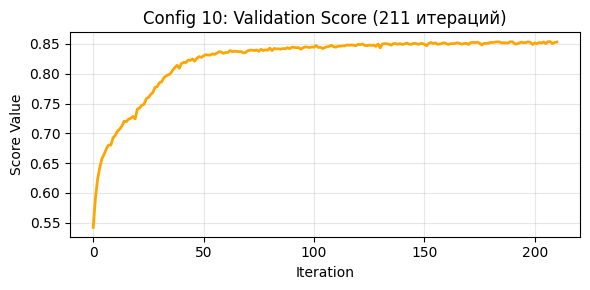

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 0.060556
Итерация   24: 0.017804
Итерация   48: 0.012096
Итерация   71: 0.010699
Итерация   94: 0.010079
Итерация  118: 0.009778
Итерация  141: 0.009597
Итерация  164: 0.009538
Итерация  188: 0.009376
Итерация  211: 0.009297

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: 0.542135
Итерация   24: 0.748650
Итерация   48: 0.826233
Итерация   71: 0.838726
Итерация   94: 0.844071
Итерация  118: 0.848369
Итерация  141: 0.849206
Итерация  164: 0.850623
Итерация  188: 0.851642
Итерация  211: 0.853331

Общее количество итераций: 211
Начальный Training Loss: 0.060556
Финальный Training Loss: 0.009297
Максимальный Validation Score: 0.853974
Финальный Validation Score: 0.853331
RMSE: 74557.8, R²: 0.85684, Итераций: 211, Времени потрачено 4.716 сек.

Конфигурация 11: слои (64,), activation tanh


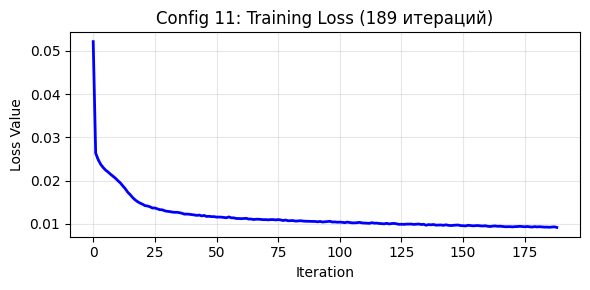

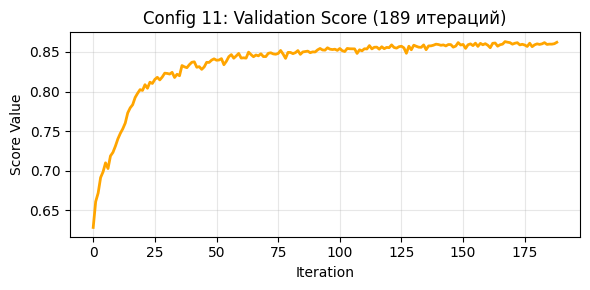

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 0.052129
Итерация   22: 0.014242
Итерация   43: 0.011979
Итерация   64: 0.011147
Итерация   85: 0.010756
Итерация  105: 0.010335
Итерация  126: 0.009943
Итерация  147: 0.009691
Итерация  168: 0.009366
Итерация  189: 0.009203

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: 0.628629
Итерация   22: 0.808593
Итерация   43: 0.830571
Итерация   64: 0.849630
Итерация   85: 0.846860
Итерация  105: 0.853887
Итерация  126: 0.857091
Итерация  147: 0.855937
Итерация  168: 0.862894
Итерация  189: 0.862034

Общее количество итераций: 189
Начальный Training Loss: 0.052129
Финальный Training Loss: 0.009203
Максимальный Validation Score: 0.862894
Финальный Validation Score: 0.862034
RMSE: 76266.3, R²: 0.85021, Итераций: 189, Времени потрачено 5.898 сек.

Конфигурация 12: слои (128,), activation tanh


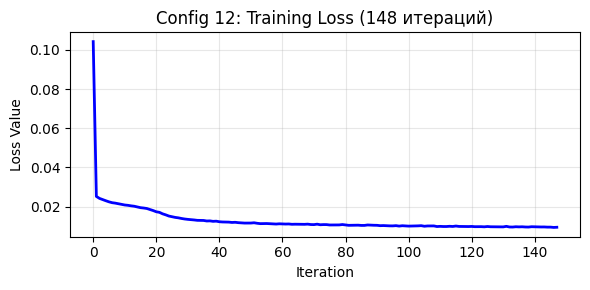

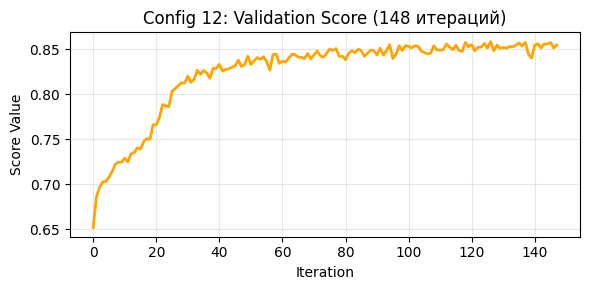

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 0.104246
Итерация   17: 0.019263
Итерация   34: 0.012970
Итерация   50: 0.011569
Итерация   66: 0.010960
Итерация   83: 0.010459
Итерация   99: 0.010220
Итерация  115: 0.009841
Итерация  132: 0.009907
Итерация  148: 0.009434

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: 0.652115
Итерация   17: 0.747254
Итерация   34: 0.826493
Итерация   50: 0.842068
Итерация   66: 0.840997
Итерация   83: 0.848133
Итерация   99: 0.848378
Итерация  115: 0.849210
Итерация  132: 0.851100
Итерация  148: 0.854387

Общее количество итераций: 148
Начальный Training Loss: 0.104246
Финальный Training Loss: 0.009434
Максимальный Validation Score: 0.858268
Финальный Validation Score: 0.854387
RMSE: 77511.2, R²: 0.84528, Итераций: 148, Времени потрачено 7.203 сек.

Конфигурация 13: слои (32, 16), activation tanh


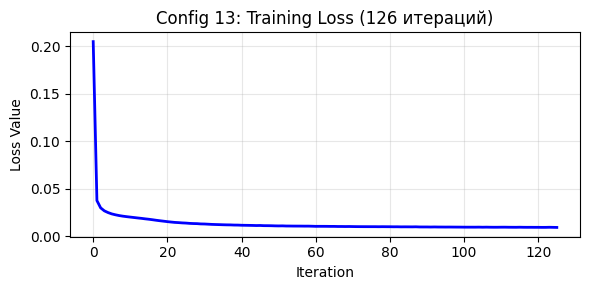

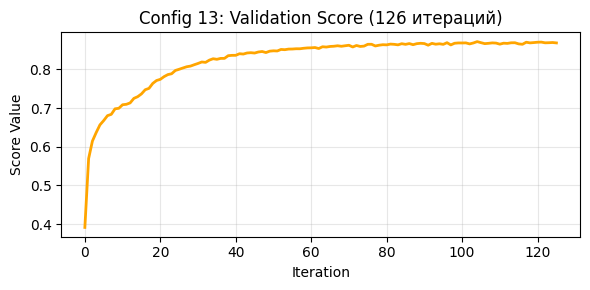

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 0.204984
Итерация   15: 0.018172
Итерация   29: 0.013106
Итерация   43: 0.011286
Итерация   57: 0.010518
Итерация   70: 0.010094
Итерация   84: 0.009720
Итерация   98: 0.009488
Итерация  112: 0.009376
Итерация  126: 0.009109

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: 0.391263
Итерация   15: 0.729236
Итерация   29: 0.808337
Итерация   43: 0.839451
Итерация   57: 0.853172
Итерация   70: 0.860927
Итерация   84: 0.863265
Итерация   98: 0.863099
Итерация  112: 0.867548
Итерация  126: 0.868257

Общее количество итераций: 126
Начальный Training Loss: 0.204984
Финальный Training Loss: 0.009109
Максимальный Validation Score: 0.871611
Финальный Validation Score: 0.868257
RMSE: 75605.4, R²: 0.85279, Итераций: 126, Времени потрачено 3.833 сек.

Конфигурация 14: слои (64, 16), activation tanh


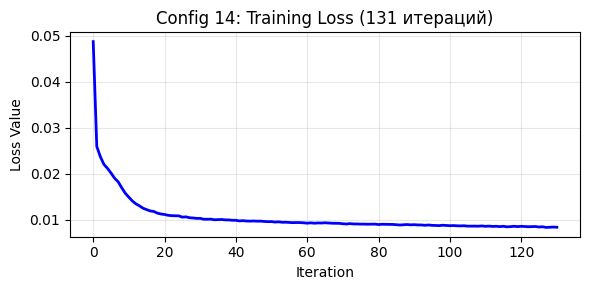

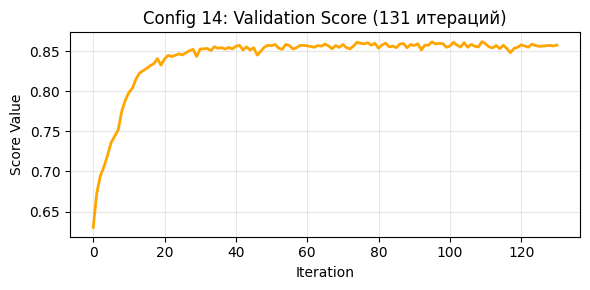

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 0.048767
Итерация   15: 0.012455
Итерация   30: 0.010248
Итерация   44: 0.009673
Итерация   59: 0.009330
Итерация   73: 0.009110
Итерация   88: 0.008855
Итерация  102: 0.008687
Итерация  117: 0.008406
Итерация  131: 0.008315

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: 0.630179
Итерация   15: 0.825602
Итерация   30: 0.843331
Итерация   44: 0.855290
Итерация   59: 0.857155
Итерация   73: 0.852794
Итерация   88: 0.859485
Итерация  102: 0.861099
Итерация  117: 0.853145
Итерация  131: 0.857494

Общее количество итераций: 131
Начальный Training Loss: 0.048767
Финальный Training Loss: 0.008315
Максимальный Validation Score: 0.861864
Финальный Validation Score: 0.857494
RMSE: 75063.6, R²: 0.85489, Итераций: 131, Времени потрачено 5.314 сек.

Конфигурация 15: слои (128, 64, 16), activation tanh


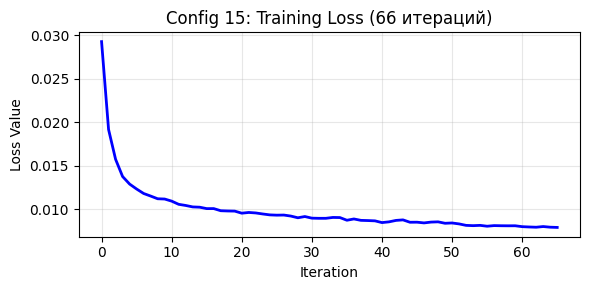

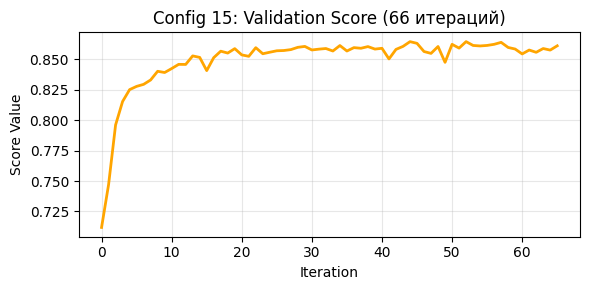

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 0.029279
Итерация    8: 0.011510
Итерация   15: 0.010227
Итерация   23: 0.009565
Итерация   30: 0.009153
Итерация   37: 0.008874
Итерация   44: 0.008767
Итерация   52: 0.008304
Итерация   59: 0.008086
Итерация   66: 0.007899

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: 0.711821
Итерация    8: 0.833104
Итерация   15: 0.851659
Итерация   23: 0.859658
Итерация   30: 0.860687
Итерация   37: 0.859699
Итерация   44: 0.860704
Итерация   52: 0.859309
Итерация   59: 0.859836
Итерация   66: 0.861193

Общее количество итераций: 66
Начальный Training Loss: 0.029279
Финальный Training Loss: 0.007899
Максимальный Validation Score: 0.864633
Финальный Validation Score: 0.861193
RMSE: 73517.8, R²: 0.86081, Итераций: 66, Времени потрачено 8.718 сек.

Конфигурация 16: слои (256, 128, 32), activation tanh


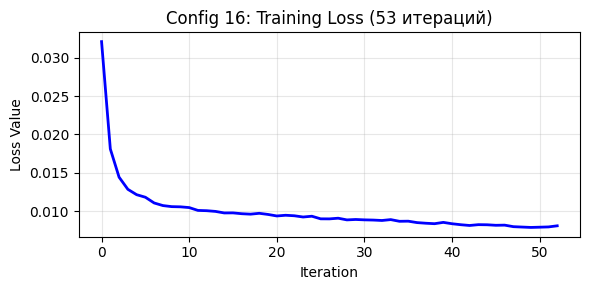

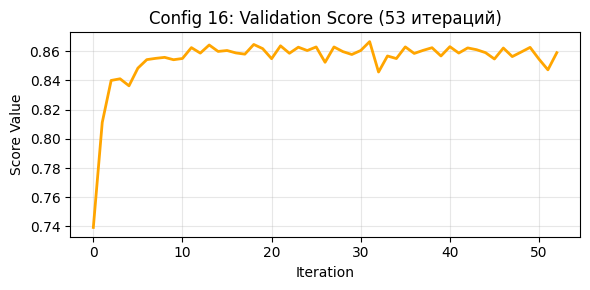

=== Training Loss (10 равномерно распределенных точек) ===
Итерация    1: 0.032098
Итерация    7: 0.011061
Итерация   13: 0.010052
Итерация   18: 0.009599
Итерация   24: 0.009229
Итерация   30: 0.008907
Итерация   36: 0.008685
Итерация   41: 0.008350
Итерация   47: 0.008169
Итерация   53: 0.008081

=== Validation Score (10 равномерно распределенных точек) ===
Итерация    1: 0.739308
Итерация    7: 0.854203
Итерация   13: 0.858673
Итерация   18: 0.857957
Итерация   24: 0.862726
Итерация   30: 0.857717
Итерация   36: 0.862932
Итерация   41: 0.863083
Итерация   47: 0.862153
Итерация   53: 0.858983

Общее количество итераций: 53
Начальный Training Loss: 0.032098
Финальный Training Loss: 0.008081
Максимальный Validation Score: 0.866535
Финальный Validation Score: 0.858983
RMSE: 73969.5, R²: 0.85909, Итераций: 53, Времени потрачено 14.66 сек.

ИТОГОВЫЕ РЕЗУЛЬТАТЫ
              Конфигурация          RMSE       R2  Итераций  Время на обучение (сек.)
         sl=(16,) act=relu 121746.982168 0.6

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import time 
import pandas as pd

configs = [
    {'hidden_layer_sizes': (16,), 'activation': 'relu'},
    {'hidden_layer_sizes': (32,), 'activation': 'relu'},
    {'hidden_layer_sizes': (64,), 'activation': 'relu'},
    {'hidden_layer_sizes': (128,), 'activation': 'relu'},
    {'hidden_layer_sizes': (32, 16), 'activation': 'relu'},
    {'hidden_layer_sizes': (64, 16), 'activation': 'relu'},
    {'hidden_layer_sizes': (128, 64, 16), 'activation': 'relu'},
    {'hidden_layer_sizes': (256, 128, 32), 'activation': 'relu'},
    {'hidden_layer_sizes': (16,), 'activation': 'tanh'},
    {'hidden_layer_sizes': (32,), 'activation': 'tanh'},
    {'hidden_layer_sizes': (64,), 'activation': 'tanh'},
    {'hidden_layer_sizes': (128,), 'activation': 'tanh'},
    {'hidden_layer_sizes': (32, 16), 'activation': 'tanh'},
    {'hidden_layer_sizes': (64, 16), 'activation': 'tanh'},
    {'hidden_layer_sizes': (128, 64, 16), 'activation': 'tanh'},
    {'hidden_layer_sizes': (256, 128, 32), 'activation': 'tanh'},
]

results = []

# y подготовка для relu и tanh
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test

# Для tanh — масштабируем y в [-1, 1] один раз
scaler_y = MinMaxScaler(feature_range=(-1, 1))
y_train_tanh = scaler_y.fit_transform(y_train_np.reshape(-1, 1)).ravel()
y_test_tanh = scaler_y.transform(y_test_np.reshape(-1, 1)).ravel()

for idx, cfg in enumerate(configs):
    print(f"\nКонфигурация {idx+1}: слои {cfg['hidden_layer_sizes']}, activation {cfg['activation']}")
    start_time = time.time()

    # Выбор правильной целевой переменной для обучения
    if cfg['activation'] == 'tanh':
        y_train_current = y_train_tanh
    else:
        y_train_current = y_train_np
    # fit
    mlp = MLPRegressor(
        hidden_layer_sizes=cfg['hidden_layer_sizes'],
        activation=cfg['activation'],
        max_iter=5000, 
        early_stopping=True, 
        validation_fraction=0.1,
        n_iter_no_change=20,
        tol=1e-4, 
        random_state=42,
        verbose=False
    )
    mlp.fit(X_train_scaled, y_train_current)
    # Предсказание
    pred = mlp.predict(X_test_scaled)
    # Для tanh: обратное преобразование
    if cfg['activation'] == 'tanh':
        pred_rescaled = scaler_y.inverse_transform(pred.reshape(-1, 1)).ravel()
    else:
        pred_rescaled = pred

    rmse = np.sqrt(mean_squared_error(y_test_np, pred_rescaled))
    r2 = r2_score(y_test_np, pred_rescaled)
    total_time = round(time.time() - start_time, 3)

    results.append({
        'Конфигурация': f"sl={cfg['hidden_layer_sizes']} act={cfg['activation']}",
        'RMSE': rmse,
        'R2': r2,
        'Итераций': mlp.n_iter_,
        'Время на обучение (сек.)': total_time
    })
    # Визуализация кривой обучения
  
    # График 1: Training Loss
    plt.figure(figsize=(6, 3))
    plt.plot(mlp.loss_curve_, color='blue', linewidth=2)
    plt.title(f"Config {idx+1}: Training Loss ({mlp.n_iter_} итераций)")
    plt.xlabel("Iteration")
    plt.ylabel("Loss Value")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # График 2: Validation Score
    plt.figure(figsize=(6, 3))
    plt.plot(mlp.validation_scores_, color='orange', linewidth=2)
    plt.title(f"Config {idx+1}: Validation Score ({mlp.n_iter_} итераций)")
    plt.xlabel("Iteration")
    plt.ylabel("Score Value")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Функция для выбора 20 равномерно распределенных индексов
    def get_uniform_indices(total_length, n_points=10):
        if total_length <= n_points:
            return list(range(total_length))
        step = (total_length - 1) / (n_points - 1)
        return [int(round(i * step)) for i in range(n_points)]
    
    # Получаем индексы для равномерного выбора
    train_indices = get_uniform_indices(len(mlp.loss_curve_))
    val_indices = get_uniform_indices(len(mlp.validation_scores_))
    
    # Текстовая информация с равномерным шагом
    print("=== Training Loss (10 равномерно распределенных точек) ===")
    for iter_num in train_indices:
        print(f"Итерация {iter_num+1:4d}: {mlp.loss_curve_[iter_num]:.6f}")
    
    print("\n=== Validation Score (10 равномерно распределенных точек) ===")
    for iter_num in val_indices:
        print(f"Итерация {iter_num+1:4d}: {mlp.validation_scores_[iter_num]:.6f}")
    
    # Дополнительная статистика
    print(f"\nОбщее количество итераций: {mlp.n_iter_}")
    print(f"Начальный Training Loss: {mlp.loss_curve_[0]:.6f}")
    print(f"Финальный Training Loss: {mlp.loss_curve_[-1]:.6f}")
    print(f"Максимальный Validation Score: {max(mlp.validation_scores_):.6f}")
    print(f"Финальный Validation Score: {mlp.validation_scores_[-1]:.6f}")
    print(f"RMSE: {rmse:.1f}, R²: {r2:.5f}, Итераций: {mlp.n_iter_}, Времени потрачено {total_time} сек.")

results_df = pd.DataFrame(results)
print("\n" + "="*80)
print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ")
print("="*80)
print(results_df.to_string(index=False))

## Построение итоговой таблицы и сравнение моделей

,Метод,RMSE,R^2,Итераций,Время на обучение (сек.)
0,Линейная регрессия,128529.800000,0.574560,,
1,"Нейронная сеть (sl=(16,) act=relu)",121746.982168,0.618278,3881,115.256
2,"Нейронная сеть (sl=(32,) act=relu)",112947.751413,0.671462,3009,132.969
3,"Нейронная сеть (sl=(64,) act=relu)",111718.877259,0.678572,1935,78.748
4,"Нейронная сеть (sl=(128,) act=relu)",110477.886131,0.685673,1495,94.394
5,"Нейронная сеть (sl=(32, 16) act=relu)",105736.048738,0.712077,560,16.42
6,"Нейронная сеть (sl=(64, 16) act=relu)",105230.763508,0.714822,487,16.955
7,"Нейронная сеть (sl=(128, 64, 16) act=relu)",73919.050341,0.859284,887,93.325
8,"Нейронная сеть (sl=(256, 128, 32) act=relu)",73032.669208,0.862638,443,95.499
9,"Нейронная сеть (sl=(16,) act=tanh)",79074.847502,0.838970,199,3.551


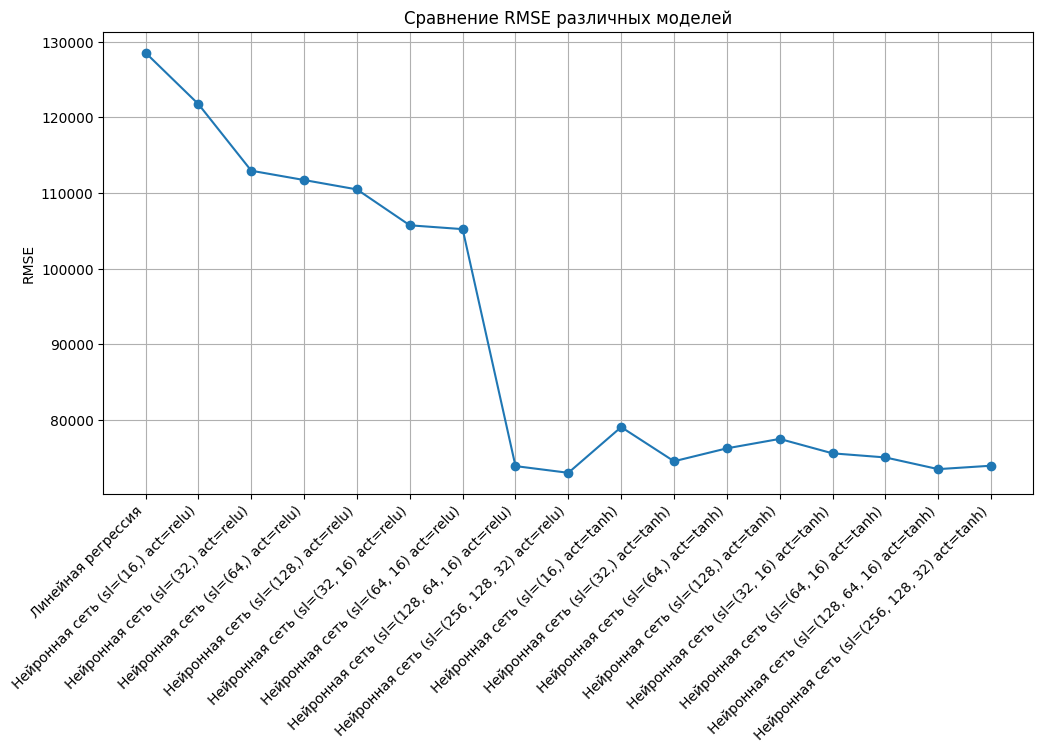


Лучший результат по RMSE:
Метод                       Нейронная сеть (sl=(256, 128, 32) act=relu)
RMSE                                                       73032.669208
R^2                                                            0.862638
Итераций                                                            443
Время на обучение (сек.)                                         95.499
Name: 8, dtype: object


In [16]:
# Данные линейной регрессии из прошлой работы
rmse_linear = 128529.8
r2_linear = 0.57456

# Итоговая таблица
table_data = {
    'Метод': ['Линейная регрессия'],
    'RMSE': [rmse_linear],
    'R^2': [r2_linear],
    'Итераций': [''],
    'Время на обучение (сек.)': ['']
}

for res in results:
    table_data['Метод'].append(f"Нейронная сеть ({res['Конфигурация']})")
    table_data['RMSE'].append(res['RMSE'])
    table_data['R^2'].append(res['R2'])
    table_data['Итераций'].append(res['Итераций'])
    table_data['Время на обучение (сек.)'].append(res['Время на обучение (сек.)'])

summary_df = pd.DataFrame(table_data)
display(summary_df)

# Визуализация сравнений
plt.figure(figsize=(12,6))
plt.plot(summary_df['Метод'], summary_df['RMSE'], marker='o', label='RMSE')
plt.xticks(rotation=45, ha='right')
plt.ylabel('RMSE')
plt.title('Сравнение RMSE различных моделей')
plt.grid(True)
plt.show()

# Лучший результат по RMSE
best_idx = summary_df['RMSE'].idxmin()
print("\nЛучший результат по RMSE:")
print(summary_df.loc[best_idx])


In [ ]:
print(1+1)